<a href="https://colab.research.google.com/github/ninichang/py-and-fs/blob/master/ML_Assignment_2_Regression_Using_MAP_and_Basis_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: MAP

Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem. Follow the instructions below: 

### 1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from scipy import linalg

In [ ]:
X = np.linspace(0, 1, 50)
Y = np.sin(X**2+1)

data = np.stack((X, Y), axis=-1)

print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[0.         0.84147098]
 [0.02040816 0.84169594]
 [0.04081633 0.84236995]
 [0.06122449 0.84349036]
 [0.08163265 0.84505279]]


###  2. Add Gaussian random noise to the data 

In [ ]:
def add_noise(y_curve) :
    mu = 0
    sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(Y)

### 3. Show the original curve line and the noisy data. 

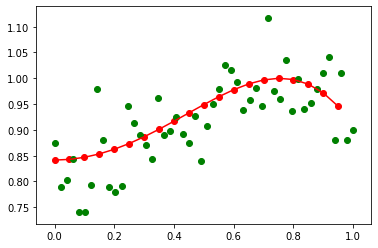

In [ ]:
def actual_distribution() :
    x = np.arange(0,1,0.05)
    y = np.sin(x**2+1)
    return x,y

# The red line is the original curve based on the equation. The green dots are the noisy data. 
plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");

### 4. Fit the generated noisy data using the MAP as discussed in class. 

In [ ]:
def MAP(tn, xn, M, alpha, beta):
    
    # t = ground truth (label) from the noisy data
    
    # Dimesion of t = N x 1
    t = np.reshape(tn, (50, 1))
    
    # Initialize matrixX with a matrix of dimension N x 0
    matrixX= np.zeros((len(X), 0))
    
    # Create an identity matrix
    identity = np.identity(M)
    
    # Update each column of matrix X with the appropriate power, from 0 to M-1
    for m in range(M):
        matrixX = np.c_[matrixX, X**m]
            
    # Perform checks if the dimention is not right
    if matrixX.shape != (len(X), M):
        print('Dimention of matrix X is wrong')

    transposeX = np.transpose(matrixX)
    
    inverseX = np.linalg.inv(np.dot(transposeX, matrixX))
    
    # Let A = dot product of X and X transpose; B = alpha over beta times the identity matrix
    A = np.dot(transposeX, matrixX)
    B = np.dot(alpha/beta, identity)
        
    inversed_term = np.linalg.inv(A + B)
    
    return np.dot(np.dot(inversed_term, transposeX), t)

w = MAP(Y_noise, X, 4, 1, 1)

### 5.  Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w. 

In [ ]:
def error(xn, tn, estimated_w):
    
    tn = np.reshape(tn, (50, 1))

    
    # Initialize matrixY with a matrix of dimension N x 0    
    fitted_Y = np.zeros((len(xn), 0))
    
    # Initialize matrixX with a matrix of dimension N x 0
    matrixX= np.zeros((len(xn), 0))

    # Update each column of matrixX with the appropriate power, from 0 to M-1
    for m in range(len(w)):
        matrixX = np.c_[matrixX, xn**m]    
        
    # Compute predited y
    fitted_Y = np.dot(matrixX, w)
    
    # Compute difference between predicted Y and actual Y element wise
    error = np.abs(np.subtract(fitted_Y, tn))
        
    return fitted_Y, np.sum(error)
        
print('Error = ', error(X, Y_noise, w)[1])


Error =  2.3919460586394514


### 6. Display the estimated values of w 

In [ ]:
print('Estimated values of w:\n', w)

Estimated values of w:
 [[ 0.78313218]
 [ 0.24004877]
 [ 0.0394862 ]
 [-0.06423829]]


### 7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha. 

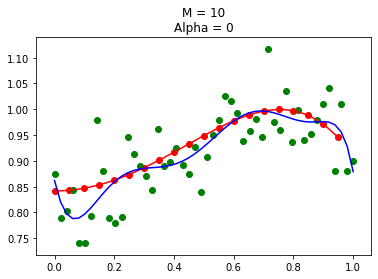

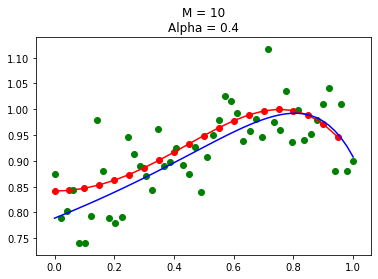

In [ ]:
# First plot

M = 10
alpha = 0

w = MAP(Y_noise, X, M, alpha, 1)
fitted_Y = fit_Y(X, Y_noise, w)[0]


X_axis = np.arange(0,1, 0.05)
plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X, fitted_Y, '-g', label='function', color="blue");

title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha)
plt.title(title)


# Second plot 

M = 10
alpha = 0.4

plt.subplots(nrows=1, ncols=1);

w = MAP(Y_noise, X, M, alpha, 1)
fitted_Y = fit_Y(X, Y_noise, w)[0]


X_axis = np.arange(0,1, 0.05)
plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X, fitted_Y, '-g', label='function', color="blue");

title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha)
plt.title(title);

### 8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy. 

As M grows larger, the algorithm tends to have higher fitting accuracy which results in overfitting. Alpha restricts overfitting by setting w close to zeros.

# Part 2: Basis Functions

Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below: 

### 1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$

In [ ]:
X = np.linspace(0, 1, 50)
Y = np.sin(X**2+1)

data = np.stack((X, Y), axis=-1)

print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[0.         0.84147098]
 [0.02040816 0.84169594]
 [0.04081633 0.84236995]
 [0.06122449 0.84349036]
 [0.08163265 0.84505279]]


###  2. Add Gaussian random noise to the data 

In [ ]:
def add_noise(y_curve) :
    mu = 0
    sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(Y)


### 3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class. 

In [ ]:
# Define the Gaussian basis function

def gaussian_basis(xn, mu, sigma):
    return np.exp(-((xn-mu)**2)/(2*sigma ** 2))

def MLE_gaussian_basis(X, t, M):
    
    big_phi = np.ones((len(X), 1))
    
    sigma = (max(X)- min(X))/M
    
    for m_index in range(1, M):
        big_phi = np.c_[big_phi, gaussian_basis(X, sigma*m_index, sigma)]

    inversed_term = np.linalg.inv(np.matmul(big_phi.T, big_phi))
    inversed_term_dot_phi_transpose = np.matmul(inversed_term, big_phi.T)
    w = np.matmul(inversed_term_dot_phi_transpose, t)
    
    predicted_y = np.matmul(big_phi, w.T)
     
    return w, predicted_y

MLE_gaussian_basis(X, Y_noise, 5)  

(array([ 0.86601255, -0.03608345,  0.0259048 ,  0.04412521,  0.09775046]),
 array([0.84815564, 0.84689011, 0.84584759, 0.8450981 , 0.84471202,
        0.84475744, 0.84529739, 0.84638712, 0.84807167, 0.85038384,
        0.8533427 , 0.85695274, 0.86120377, 0.86607143, 0.87151834,
        0.87749577, 0.88394565, 0.89080271, 0.89799667, 0.90545415,
        0.91310028, 0.92085987, 0.92865802, 0.93642032, 0.94407256,
        0.95154024, 0.95874783, 0.96561826, 0.97207252, 0.97802974,
        0.9834079 , 0.98812512, 0.99210161, 0.99526228, 0.99753978,
        0.99887782, 0.99923457, 0.99858574, 0.99692727, 0.99427712,
        0.99067623, 0.9861883 , 0.98089848, 0.97491085, 0.96834504,
        0.96133197, 0.95400906, 0.94651522, 0.93898592, 0.93154857]))

### 4. Show your results for different values of M that generate overfitting and underfitting curves. 

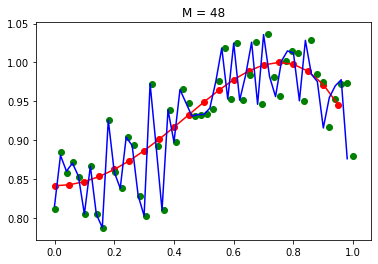

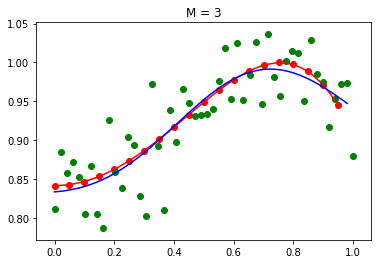

In [ ]:
M = 48

X_axis = np.arange(0,1, 0.02)


plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X_axis, MLE_gaussian_basis(X_axis, Y_noise, M)[1], '-g', label='function', color="blue");
title = 'M = '+ str(M) 
plt.title(title);

plt.subplots(nrows=1, ncols=1);

M = 3
sigma = 0.2

X_axis = np.arange(0,1, 0.02)


plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X_axis, MLE_gaussian_basis(X_axis, Y_noise, M)[1], '-g', label='function', color="blue");
title = 'M = '+ str(M) 
plt.title(title);

### 5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

In [ ]:
def sigmoid_basis(xn, mu, s):
    return 1/(1+ np.exp(-(xn-mu)/s))

def MLE_sigmoid_basis(X, t, M):
    
    big_phi = np.ones((len(X), 1))
    sigma = (max(X)- min(X))/M
    
    for m_index in range(1, M):
        big_phi = np.c_[big_phi, sigmoid_basis(X, sigma*m_index, sigma)]

    inversed_term = np.linalg.inv(np.matmul(big_phi.T, big_phi))
    inversed_term_dot_phi_transpose = np.matmul(inversed_term, big_phi.T)
    w = np.matmul(inversed_term_dot_phi_transpose, t)
    
    predicted_y = np.matmul(big_phi, w.T)
     
    return w, predicted_y
    
MLE_sigmoid_basis(X, Y_noise, 5)  

(array([ 0.86855094, -0.28141027,  0.28125816,  0.73872061, -0.7920193 ]),
 array([0.8471839 , 0.84660631, 0.84620747, 0.84602692, 0.84610684,
        0.84649138, 0.84722578, 0.84835527, 0.84992386, 0.8519729 ,
        0.85453957, 0.85765533, 0.86134425, 0.86562153, 0.87049203,
        0.87594902, 0.88197318, 0.88853186, 0.89557871, 0.90305369,
        0.91088342, 0.91898204, 0.92725242, 0.93558784, 0.94387399,
        0.95199141, 0.95981815, 0.96723276, 0.97411733, 0.98036064,
        0.98586124, 0.99053028, 0.99429405, 0.99709611, 0.99889877,
        0.99968405, 0.99945388, 0.99822959, 0.99605084, 0.99297378,
        0.98906886, 0.98441814, 0.97911241, 0.97324822, 0.96692491,
        0.96024188, 0.95329604, 0.94617971, 0.93897888, 0.93177187]))

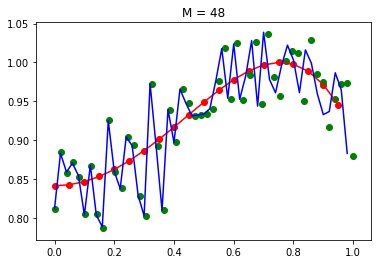

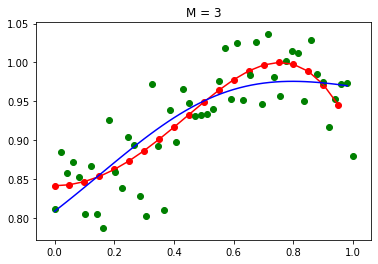

In [ ]:
M = 48

X_axis = np.arange(0,1, 0.02)


plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X_axis, MLE_sigmoid_basis(X_axis, Y_noise, M)[1], '-g', label='function', color="blue");
title = 'M = '+ str(M) 
plt.title(title);

plt.subplots(nrows=1, ncols=1);

M = 3
sigma = 0.2

X_axis = np.arange(0,1, 0.02)


plt.scatter(actual_distribution()[0], actual_distribution()[1], color="red")
plt.plot(actual_distribution()[0], actual_distribution()[1], '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X_axis, MLE_sigmoid_basis(X_axis, Y_noise, M)[1], '-g', label='function', color="blue");
title = 'M = '+ str(M) 
plt.title(title);

### 6. Change the original curve function to $y=0.4345x^3-5.607x^2+16.78x-10.61$ , and use the sigmoid basis function to estimate the best curve fitting from the noisy data. 

In [ ]:
X = np.linspace(0, 9, 50)
Y = 0.4345*(X**3) - 5.607*(X**2) + 16.78*X - 10.61

data = np.stack((X, Y), axis=-1)
print('First 5 rows of generated data:\n', data[0:5])

def add_noise(y_curve) :
    mu = 0
    sigma = 4.0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(Y)

def actual_distribution() :
    x = np.arange(0,9,0.5)
    y = 0.4345 * np.power(x, 3) - 5.607 * np.power ( x, 2) + 16.78 * x - 10.61
    return x,y

First 5 rows of generated data:
 [[  0.         -10.61      ]
 [  0.18367347  -7.71442428]
 [  0.36734694  -5.18100943]
 [  0.55102041  -2.99360142]
 [  0.73469388  -1.13604626]]


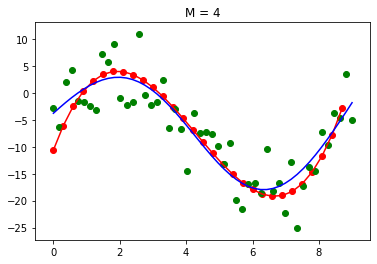

In [ ]:
M = 4

X_axis = np.arange(0,9, 0.3)

def curve_func(X):
    return 0.4345*(X**3) - 5.607*(X**2) + 16.78*X - 10.61

plt.scatter(X_axis, curve_func(X_axis), color="red")
plt.plot(X_axis, curve_func(X_axis), '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");
plt.plot(X, MLE_sigmoid_basis(X, Y_noise, M)[1], '-g', label='function', color="blue");

title = 'M = '+ str(M) 
plt.title(title);

### 7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions. 

In [ ]:
# Plots using Gaussian basis function

def plot(M, X, actual_distribution, X_axis_lower, X_axis_higher, X_axis_gap):

    X = np.arange(X_axis_lower, X_axis_higher, X_axis_gap)
    Y = 0.4345*(X**3) - 5.607*(X**2) + 16.78*X - 10.61
    Y_noise = add_noise(Y)
    

    plt.scatter(X, Y, color="red")
    plt.plot(X, Y, '-g', label='function', color="red")

    plt.scatter(X, Y_noise, color="green");
    
    plt.plot(X, MLE_gaussian_basis(X, Y_noise, M)[1], '-g', label='function', color="blue");

    plt.title('Gaussian basis. ' + 'M = ' + str(M))

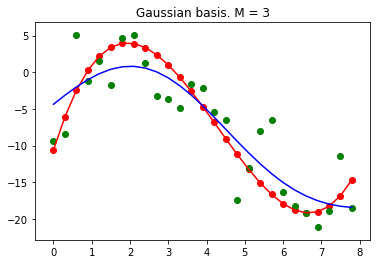

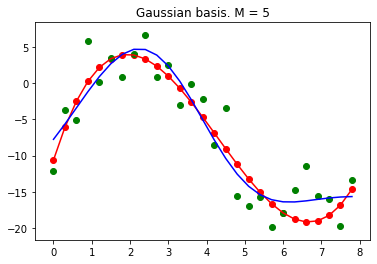

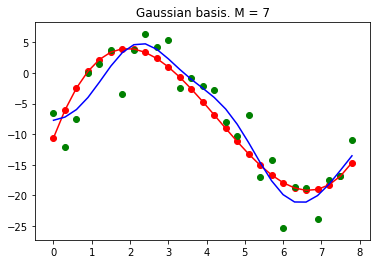

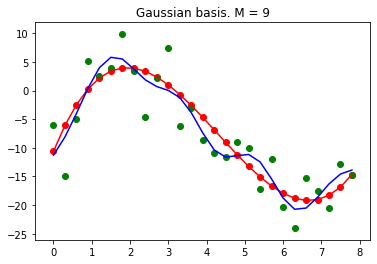

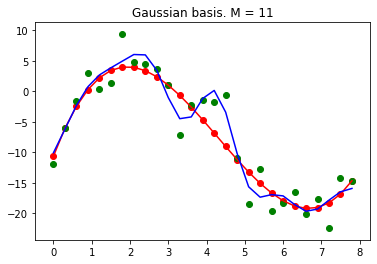

In [ ]:
plot(3, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(5, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(7, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(9, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(11, X, actual_distribution(), 0, 8, 0.3); 

In [ ]:
# Plots using sigmoid basis function

def plot(M, X, actual_distribution, X_axis_lower, X_axis_higher, X_axis_gap):

    X = np.arange(X_axis_lower, X_axis_higher, X_axis_gap)
    Y = 0.4345*(X**3) - 5.607*(X**2) + 16.78*X - 10.61
    Y_noise = add_noise(Y)
    
    plt.scatter(X, Y, color="red")
    plt.plot(X, Y, '-g', label='function', color="red")
    plt.scatter(X, Y_noise, color="green");
    
    plt.plot(X, MLE_sigmoid_basis(X, Y_noise, M)[1], '-g', label='function', color="blue");

    plt.title('Sigmoid basis. ' + 'M = '  + str(M))

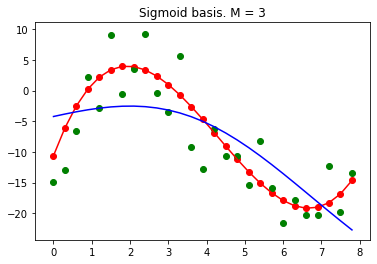

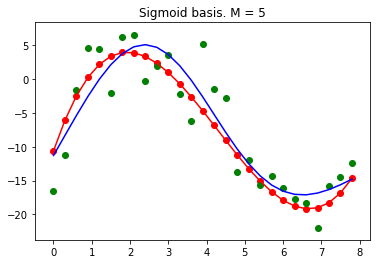

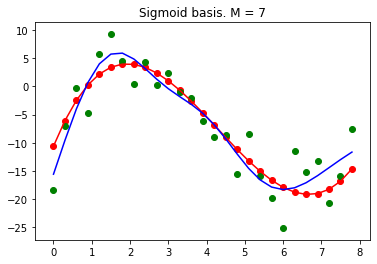

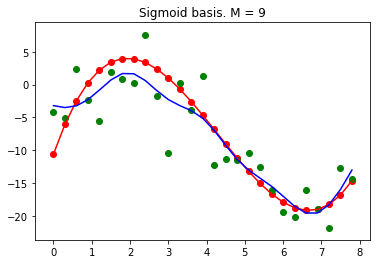

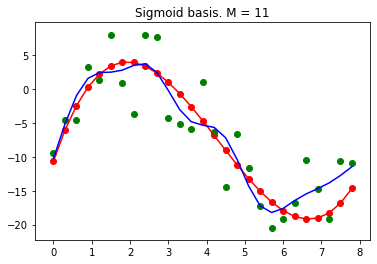

In [ ]:
plot(3, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(5, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(7, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(9, X, actual_distribution(), 0, 8, 0.3); plt.subplots(nrows=1, ncols=1);
plot(11, X, actual_distribution(), 0, 8, 0.3); 

There are multiple advantages of using basis functions over polynomial functions. The first one being basis functions are more general. They are more expressive both uniformly and non uniformly across the sample data. In addition, basis functions are more stable numerically than polynomials. Finally, basis functions allow transformataion of the input data into a higher dimensional space. 